Breast Cancer SVM Analysis
*Exploratory Data Analysis and first experiments with the Breast Cancer Wisconsin dataset*


In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import os



In [8]:
os.makedirs("outputs/plots", exist_ok=True)

In [3]:
from sklearn import datasets
bunch_data = datasets.load_breast_cancer()


In [9]:
bunch_data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer Wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

_breast_cancer_dataset

Breast Cancer Wisconsin (Diagnostic) Dataset
--------------------------------------------

Data Set Characteristics:
- Number of Instances: 569
- Number of Attributes: 30 numeric, predictive attributes and the class

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

  The mean, standard error, and "worst" (largest mean of three worst values)
  of these features were computed for each image, resulting in 30 features.
  For instance:
  - Field 0 -> Mean Radius
  - Field 10 -> Radius SE
  - Field 20 -> Worst Radius

- class:
    - WDBC-Malignant
    - WDBC-Benign

Summary Statistics:

Feature                           Min       Max
------------------------------------------
radius (mean)                     6.981    28.11
texture (mean)                    9.71     39.28
perimeter (mean)                  43.79    188.5
area (mean)                       143.5    2501.0
smoothness (mean)                 0.053    0.163
compactness (mean)                0.019    0.345
concavity (mean)                  0.0      0.427
concave points (mean)             0.0      0.201
symmetry (mean)                   0.106    0.304
fractal dimension (mean)          0.05     0.097
radius (standard error)           0.112    2.873
texture (standard error)          0.36     4.885
perimeter (standard error)        0.757    21.98
area (standard error)             6.802    542.2
smoothness (standard error)       0.002    0.031
compactness (standard error)      0.002    0.135
concavity (standard error)        0.0      0.396
concave points (standard error)   0.0      0.053
symmetry (standard error)         0.008    0.079
fractal dimension (standard error)0.001    0.03
radius (worst)                    7.93     36.04
texture (worst)                   12.02    49.54
perimeter (worst)                 50.41    251.2
area (worst)                      185.2    4254.0
smoothness (worst)                0.071    0.223
compactness (worst)               0.027    1.058
concavity (worst)                 0.0      1.252
concave points (worst)            0.0      0.291
symmetry (worst)                  0.156    0.664
fractal dimension (worst)         0.055    0.208

Missing Attribute Values: None
Class Distribution: 212 - Malignant, 357 - Benign

Creator: Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian
Donor: Nick Street
Date: November 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle aspirate (FNA)
of a breast mass. They describe characteristics of the cell nuclei present
in the image.

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T)
[K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings
of the 4th Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear programming
to construct a decision tree. Relevant features were selected using an
exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the
3-dimensional space is described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming
Discrimination of Two Linearly Inseparable Sets", Optimization Methods
and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

References:
- W.N. Street, W.H. Wolberg, O.L. Mangasarian. Nuclear feature extraction
  for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium
  on Electronic Imaging: Science and Technology, volume 1905, pages 861-870.
- O.L. Mangasarian, W.N. Street, W.H. Wolberg. Breast cancer diagnosis
  and prognosis via linear programming. Operations Research, 43(4),
  pages 570-577, July-August 1995.
- W.H. Wolberg, W.N. Street, O.L. Mangasarian. Machine learning techniques
  to diagnose breast cancer from fine-needle aspirates. Cancer Letters
  77 (1994) 163-171.




In [4]:
X, y = bunch_data.data, bunch_data.target

In [11]:
# Count occurrences of each class
(unique, counts) = np.unique(y, return_counts=True)
percentages = counts / counts.sum() * 100

for label, pct in zip(unique, percentages):
    print(f"Label {label}: {pct:.2f}%")

Label 0: 37.26%
Label 1: 62.74%


The Wisconsin Breast Cancer Dataset exhibits a slight class imbalance:

- Label 0 (benign): 37.26%  
- Label 1 (malignant): 62.74%  

As a result, **accuracy is not a reliable performance metric** in this context. A classifier that predicts only the majority class (Label 1) would already achieve around 62–63% accuracy without correctly identifying any samples from the minority class. Therefore, accuracy can give a misleading impression of model performance.  

Better alternatives are **Precision, Recall, F1-Score**, or **ROC-AUC**, which account for the performance on each class individually.


Since we have determined that accuracy is not appropriate, the next step is to select a more informative metric that properly reflects the model's ability to distinguish between the classes.

# Choosing a Performance Metric for the Wisconsin Breast Cancer Dataset

Since we know that accuracy can be misleading due to the class imbalance in this dataset (Label 0: 37.26%, Label 1: 62.74%), we need to focus on metrics that allow us to properly assess how well our model can classify both classes.  

## Candidate Performance Metrics

| Metric | What it measures | Why it’s useful for us |
|--------|----------------|------------------------|
| **Precision** | Fraction of predicted positives that are correct | Helps us understand how reliable our positive predictions are (e.g., predicting “malignant”) |
| **Recall (Sensitivity)** | Fraction of actual positives that are correctly predicted | Ensures that we detect as many malignant tumors as possible (minimizing false negatives) |
| **F1-Score** | Harmonic mean of Precision and Recall | Balances Precision and Recall; useful when both false positives and false negatives matter for our evaluation |
| **ROC-AUC** | Area under the Receiver Operating Characteristic curve | Measures our model’s ability to discriminate between classes across all thresholds; robust to class imbalance |

## Our Recommended Approach

1. We will start by examining the **F1-Score for the minority class**. This allows us to ensure that our model is not ignoring the less frequent class (Label 0). If the F1-Score is low for this class, it indicates that the model is biased toward the majority class and fails to correctly identify benign cases. This step is particularly important in medical datasets where missing a diagnosis could have serious consequences.  

2. When training models, such as **SGD classifiers**, and when analyzing **learning curves**, we will use **F1-Score or Recall as the primary performance metric** instead of accuracy.  
   - **Recall** is especially critical because we want to minimize false negatives (missing malignant cases).  
   - **F1-Score** provides a balanced measure that accounts for both false positives and false negatives, making it suitable for hyperparameter tuning and model comparison.  

3. We will also consider **ROC-AUC** as an overall metric for comparing models, since it evaluates the classifier’s ability to separate classes across all thresholds and is robust to class imbalance.  



In [12]:
df = pd.DataFrame(X, columns = bunch_data.feature_names)

df["target"] = y

In [13]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


All features are numeric

In [14]:
df.info()



<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         569 non-null

569 data points, every feature dtype float64, target dtype int64


In [15]:
# Descriptive statistics
describe = df.describe()
p01 = df.quantile(0.01)  # 1st percentile
p99 = df.quantile(0.99)  # 99th percentile

# Threshold for "significant" difference (10% of range)
threshold = 0.10  

outlier_columns = []

for col in df.columns:
    # Difference from min and max
    diff_min = p01[col] - df[col].min()
    diff_max = df[col].max() - p99[col]
    
    # Relative difference compared to the full range
    rel_diff_min = diff_min / (df[col].max() - df[col].min())
    rel_diff_max = diff_max / (df[col].max() - df[col].min())
    
    # Flag columns where the difference is significant
    if rel_diff_min > threshold or rel_diff_max > threshold:
        outlier_columns.append(col)

non_outlier_columns = [col for col in df.columns if col not in outlier_columns]
print("Columns that likely contain outliers:", outlier_columns)
print("Columns without significant outliers:", non_outlier_columns)



Columns that likely contain outliers: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst symmetry', 'worst fractal dimension']
Columns without significant outliers: ['worst concave points', 'target']


Most columns contain significant outliers; therefore, feature scaling is essential, especially when using SVM.

In [16]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

The dataset contains no missing values in any feature, ensuring data completeness. This allows for direct modeling without the need for imputation or missing value handling.

The Freedman-Diaconis rule is a statistical method used to determine the optimal bin width (\(h\)) for a histogram, designed to minimize the difference between the empirical histogram and the underlying probability density function. It is highly robust to outliers and skewed data because it uses the interquartile range (IQR) rather than the standard deviation. 

Formula 
The bin width \(h\) is calculated as:
$$
\text{Bin Width} = 2 \times \frac{\mathrm{IQR}(x)}{\sqrt[3]{n}}
$$

Where: IQR(x) is the Interquartile Range of the data $75^{th}-25^{th}$ percentile.
n is the total number of observations in the sample. 

Key Characteristics Robustness: 
Because it relies on the IQR, this rule is less sensitive to extreme outliers than rules based on data range or standard deviation.

Optimal Density: It is designed to minimize the integrated mean squared error of the density estimate.Application: It is particularly effective for large datasets or data with heavy-tailed distributions.Implementation: It is often implemented in statistical software (e.g., nclass.FD in R, 'fd' in MATLAB histcounts, numpy.histogram_bin_edges(data, bins='fd')). 

Comparison
While simpler rules like Sturges' rule (best for normal distributions) or Scott's rule exist, the Freedman-Diaconis rule generally provides a better balance for non-normal or skewed data by adapting to the scale of the data. 

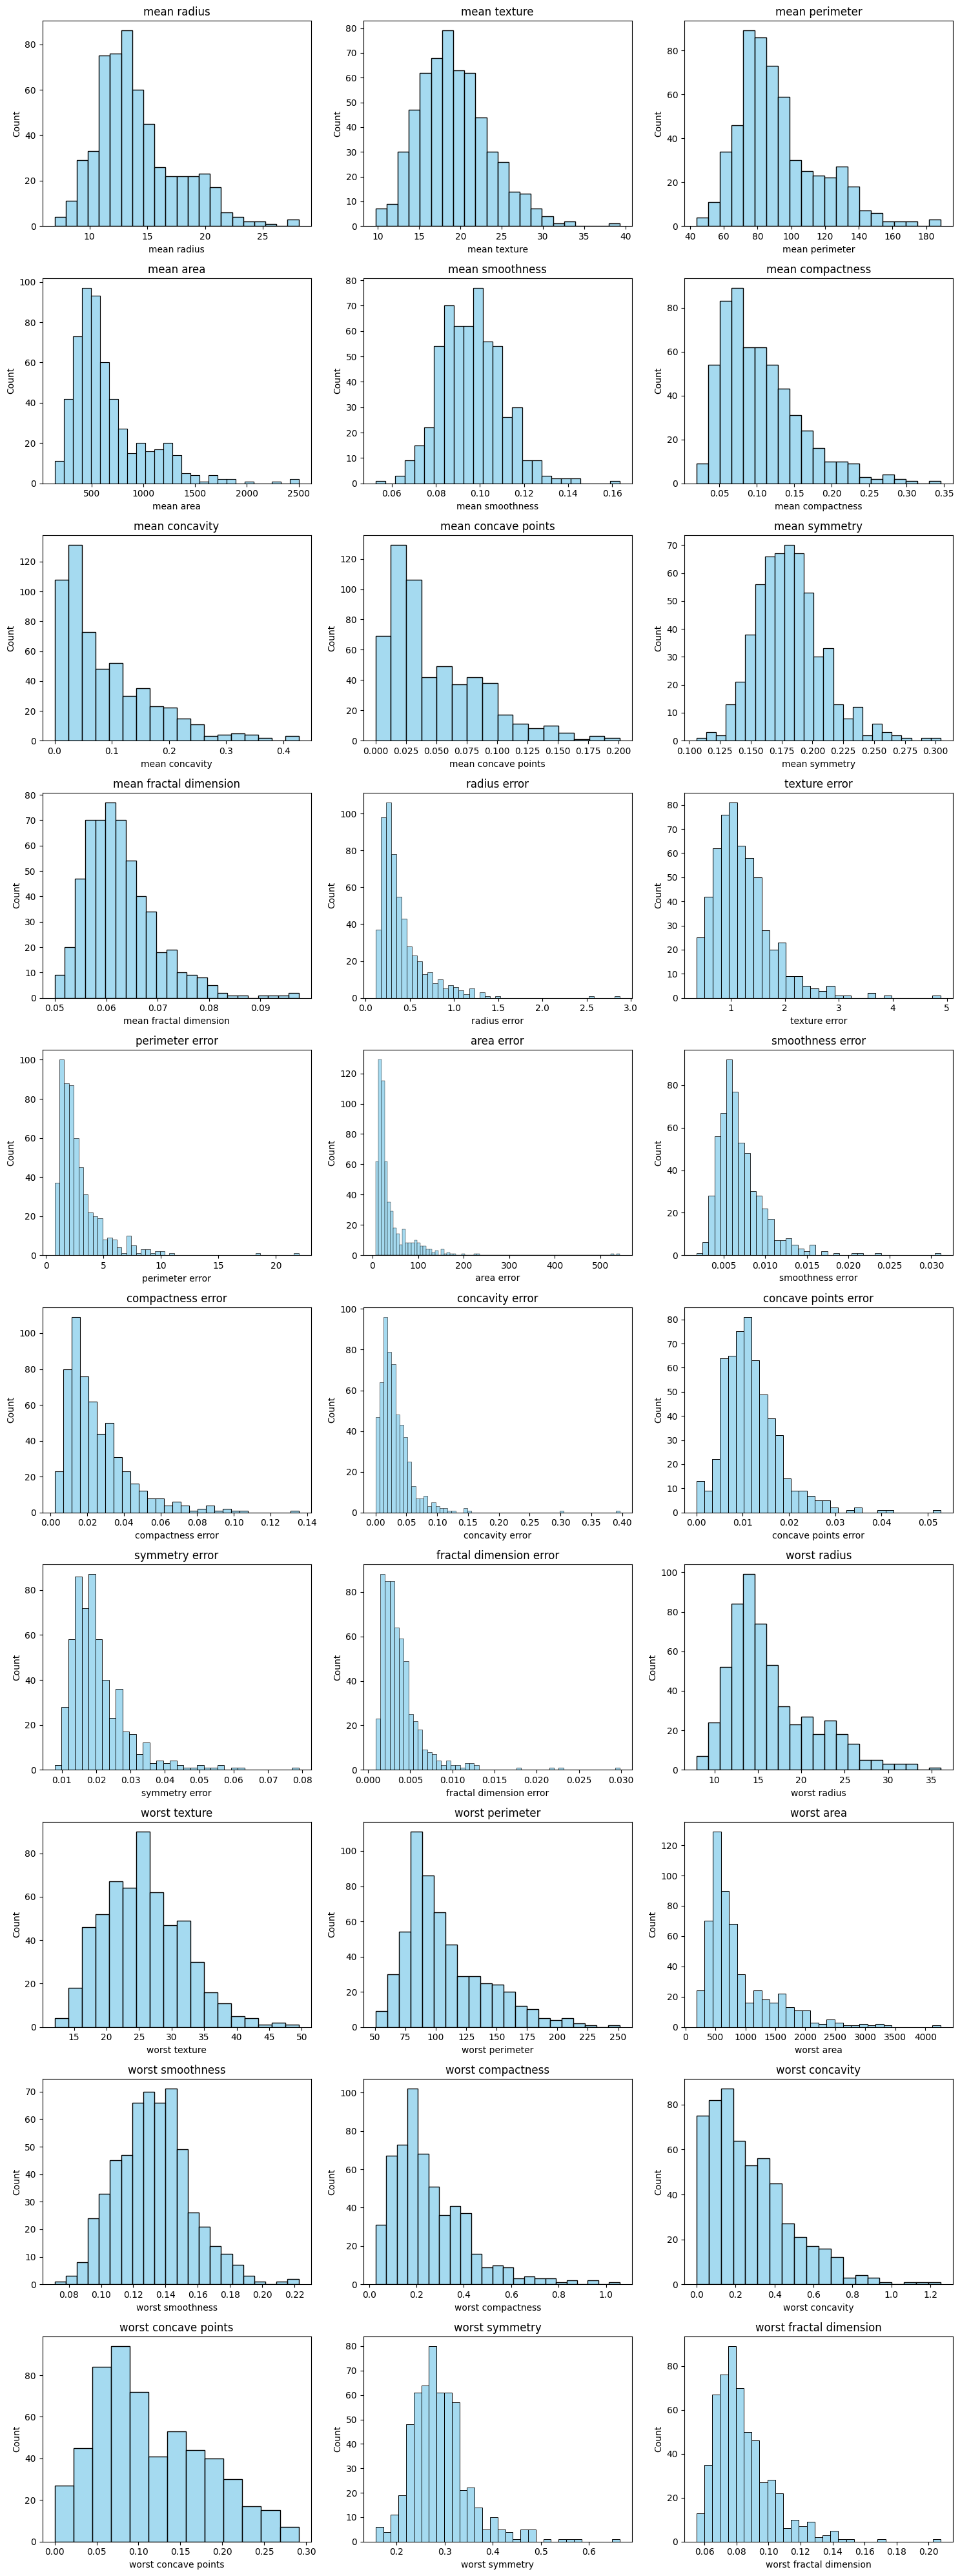

In [17]:
import math

def freedman_diaconis_bins(x):
    """Returns the number of bins according to the Freedman-Diaconis rule."""
    x = np.asarray(x)
    q75, q25 = np.percentile(x, [75 ,25])
    iqr = q75 - q25
    n = len(x)
    bin_width = 2 * iqr / (n ** (1/3))
    if bin_width == 0:  # if all values are equal
        return 1
    return int(np.ceil((x.max() - x.min()) / bin_width))

df_without_target = df.drop(["target"], axis = 1)
n_cols = len(df_without_target.columns)
cols_per_row = 3  # number of plots per row
rows = math.ceil(n_cols / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5*cols_per_row, 4*rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(df_without_target.columns):
    bins = freedman_diaconis_bins(df[col])
    sns.histplot(df[col], ax=axes[i], bins=bins, color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)

# Hide any unused axes if n_cols < rows*cols_per_row
for j in range(n_cols, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Right-Skewed Features and Implications for SVM

Through histogram analysis, the following features were identified as **right-skewed**:

- mean area, mean compactness, mean concavity, mean concave points, mean fractal dimension  
- radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error  
- worst radius, worst perimeter, worst area, worst compactness, worst concavity, worst symmetry, worst fractal dimension

**Implications for SVM:**

- SVMs are **sensitive to the scale of features** but generally robust to skewness in the distribution.  
- Right-skewed distributions can result in a few very large values, which may **dominate the distance metric** used by SVM.  
- **Standard scaling (StandardScaler)** is usually sufficient, as it centers the data and normalizes variance.  
- **Optional:** For extremely skewed features, a **log or power transformation** can reduce skewness and may improve model stability, though it is not strictly necessary for SVM.  
- Overall, scaling all features ensures that right-skewed features do not disproportionately affect the SVM decision boundary.


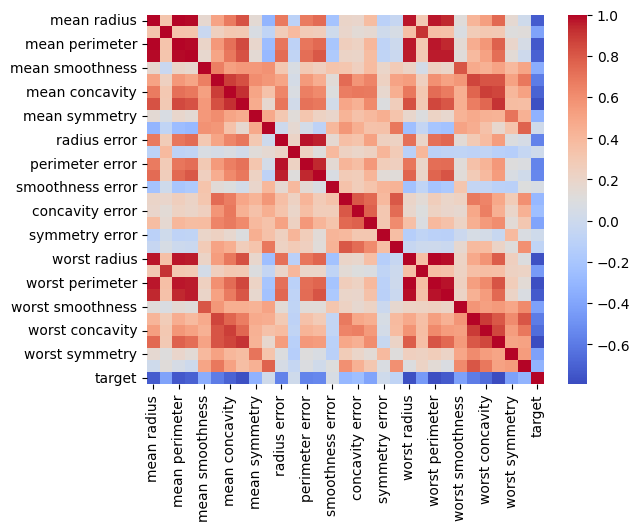

In [18]:
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [19]:
## Feature Correlation with Target
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending = False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

- Features with strong negative correlation (|r| > 0.7), such as 'worst concave points', 'worst perimeter', and 'mean concave points', are the most predictive for the target.  
- Features with weak correlations (|r| < 0.1), such as 'smoothness error' or 'mean fractal dimension', contribute little individually.  
- This suggests that SVM models should focus on the highly correlated features, though all features can be used since SVMs are robust to multicollinearity.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



## ⚖️ Model Comparison — Identifying the Best Classifier Type

Before optimizing hyperparameters, it is essential to determine **which model architecture performs best** on our dataset.  
Tuning a model that is not fundamentally suitable would only waste time, so this step ensures we start with the most promising approach.

In this comparison, we evaluate several classifiers with **5-fold stratified cross-validation** using **F1-Macro** as the performance metric, ensuring balanced evaluation across both classes.

Each model is embedded in a **pipeline that includes a StandardScaler**, so that all features are standardized before model training.  
This guarantees fair comparison, especially for algorithms that are sensitive to feature magnitudes such as SVMs and logistic regression.

The models to be tested are:

- **LinearSVC** – a linear Support Vector Machine suitable for linearly separable data  
- **RBF SVM** – a nonlinear kernel SVM that can capture complex boundaries  
- **Logistic Regression** – a strong linear baseline similar in nature to LinearSVC  
- **Random Forest** – a nonlinear ensemble model that can detect feature interactions

After cross-validation, we will compare their mean **F1-Macro scores** to identify which algorithm provides the best balance between bias and variance.  
The top one or two models will then be analyzed more deeply with **learning curves** and **hyperparameter tuning**.


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Define stratified CV to preserve class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models wrapped in pipelines with StandardScaler
models = {
    "LinearSVC": make_pipeline(
        StandardScaler(),
        LinearSVC(max_iter=20000, random_state=42)
    ),
    "RBF SVM": make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", random_state=42)
    ),
    "Polynomial SVM": make_pipeline(
        StandardScaler(),
        SVC(kernel="poly", degree=3, random_state=42)  # degree=3 = cubic kernel
    ),
    "Logistic Regression": make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=20000, random_state=42)
    ),
    "Random Forest": make_pipeline(
        RandomForestClassifier(random_state=42)
    ),
}

# Evaluate each model with cross-validation
print(f"🔍 5-Fold Cross-Validation Results (F1-Macro):\n")
scores_summary = []

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring="f1_macro", n_jobs=-1)
    mean_score = scores.mean()
    std_score = scores.std()
    scores_summary.append((name, mean_score, std_score))
    print(f"{name:20s} -> F1-Macro: {mean_score:.4f} ± {std_score:.4f}")

# Sort models by mean performance
scores_summary.sort(key=lambda x: x[1], reverse=True)

print("\n🏆 Model Ranking (by mean F1-Macro):")
for rank, (name, mean, std) in enumerate(scores_summary, start=1):
    print(f"{rank}. {name:20s} - {mean:.4f} ± {std:.4f}")


🔍 5-Fold Cross-Validation Results (F1-Macro):

LinearSVC            -> F1-Macro: 0.9642 ± 0.0138
RBF SVM              -> F1-Macro: 0.9754 ± 0.0175
Polynomial SVM       -> F1-Macro: 0.8910 ± 0.0351
Logistic Regression  -> F1-Macro: 0.9714 ± 0.0183
Random Forest        -> F1-Macro: 0.9529 ± 0.0135

🏆 Model Ranking (by mean F1-Macro):
1. RBF SVM              - 0.9754 ± 0.0175
2. Logistic Regression  - 0.9714 ± 0.0183
3. LinearSVC            - 0.9642 ± 0.0138
4. Random Forest        - 0.9529 ± 0.0135
5. Polynomial SVM       - 0.8910 ± 0.0351


## 📊 Model Comparison — Interpretation of F1-Macro Scores

The 5-fold cross-validation results provide a clear ranking of the classifiers based on their **F1-Macro performance**, which balances classification quality across both benign and malignant classes.

### Key Observations

1️⃣ **Top Performers**
- **RBF SVM** achieved the highest mean F1-Macro score (**0.975 ± 0.018**), indicating excellent generalization and strong handling of potential nonlinear patterns in the data.
- **Logistic Regression** follows closely (**0.971 ± 0.018**), demonstrating that a linear model with proper regularization also performs very well on this dataset.

2️⃣ **Linear Models**
- **LinearSVC** scored slightly lower (**0.964 ± 0.014**), confirming that the dataset is largely linearly separable. Its performance is very stable, and it has strong potential for further improvement through hyperparameter tuning (e.g., adjusting `C`).  
- The small standard deviation across folds suggests low variance and consistent behavior.

3️⃣ **Ensemble and Nonlinear Polynomial Models**
- **Random Forest** performs reasonably well (**0.953 ± 0.014**), slightly below the top linear/nonlinear SVMs, possibly due to limited ensemble size or lack of strong feature interactions.  
- **Polynomial SVM** performs worst (**0.891 ± 0.035**), likely because a cubic polynomial overfits smaller training folds and struggles to generalize, as indicated by both lower mean F1 and higher variability.

### ✅ Interpretation and Next Steps
- Based on the results, the **RBF SVM**, **Logistic Regression**, and **LinearSVC** are selected for further analysis.  
- The next step is to **generate learning curves** for these three models to study their F1-Macro performance on training and validation sets as training size increases.  
- This will allow us to identify potential **overfitting or underfitting trends**, and guide **hyperparameter tuning** (e.g., adjusting `C`) for optimal performance.


## 📈 Learning Curves for Top Models

Based on the 5-fold cross-validation results, we have identified three promising models for further analysis:

1. **RBF SVM** – the top performer in terms of mean F1-Macro, capable of capturing nonlinear patterns.  
2. **Logistic Regression** – a strong linear model, slightly below RBF SVM, but highly interpretable and stable.  
3. **LinearSVC** – a linear SVM, slightly lower F1-Macro, but worth analyzing due to its stability, interpretability, and hyperparameter potential.

### Objective of Learning Curves
For these selected models, we will plot **learning curves** to:

- Visualize the **F1-Macro performance** on both training and validation sets as a function of training set size.  
- Identify **overfitting or underfitting trends**, helping us determine if additional training data could improve performance.  
- Inform **hyperparameter tuning**, such as adjusting the regularization parameter `C`, by quantifying the training-validation gap.

### Methodology
- Each model will be wrapped in a **pipeline including a `StandardScaler`** to ensure fair comparison and proper preprocessing.  
- We will use **5-fold stratified cross-validation** to maintain class balance.  
- Training set sizes will gradually increase from a small subset to the full dataset, providing insight into how each model **learns with more data**.


Project root: c:\Users\tobia\OneDrive\Desktop\PythonProjects\breast_cancer_diagnosis_project

📈 Learning Curve for RBF SVM:


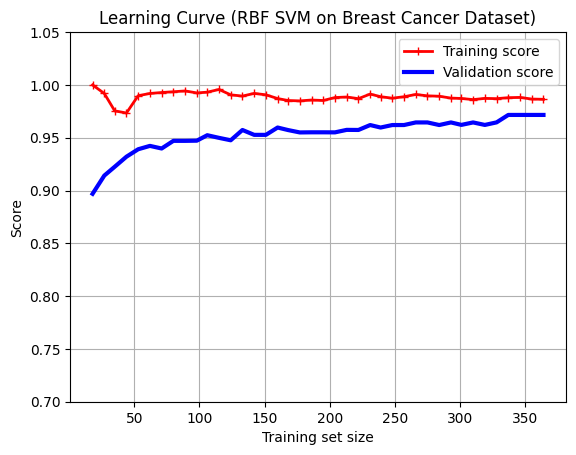


📈 Learning Curve for Logistic Regression:


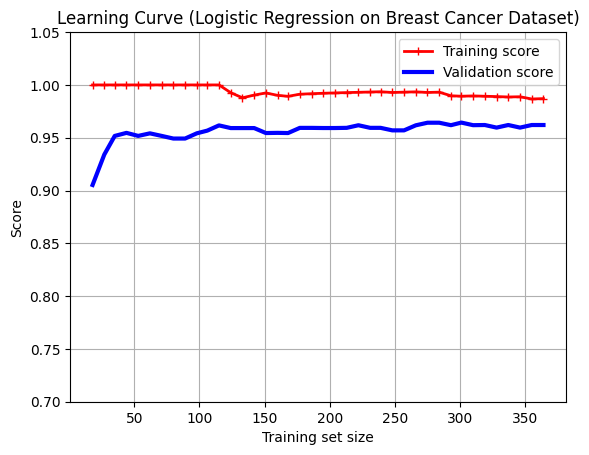


📈 Learning Curve for LinearSVC:


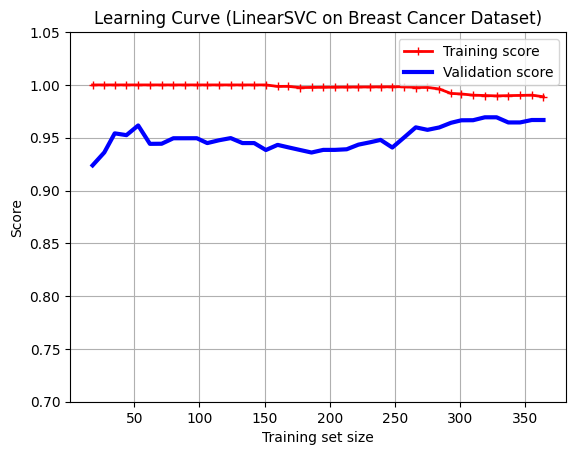

In [7]:
import sys
sys.path.append("..")

from src.utils.visualize import learning_curve_plot
from sklearn.model_selection import learning_curve



promising_models = [name for name, mean, std in scores_summary if mean > 0.96]

for model_name in promising_models:
    print(f"\n📈 Learning Curve for {model_name}:")
    model = models[model_name]
    learning_curve_plot(model, model_name, X_train, y_train)
    



#from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

#model = make_pipeline(
    #StandardScaler(),
    #LinearSVC(max_iter=20000, random_state=42)
#)


In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve

cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)

for model_name in promising_models:
    model = models[model_name]
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X_train, y_train, train_sizes = np.linspace(0.05, 1.0, 40), cv=cv, scoring="f1_macro", n_jobs=-1
    )
    train_mean_scores = train_scores.mean(axis=1)
    valid_mean_scores = valid_scores.mean(axis=1)
    print(f"Learning curve values for {model_name}:")
    print("Train Sizes:", train_sizes.tolist())
    print("Train Mean Scores:", train_mean_scores.tolist())
    print("Valid Mean Scores:", valid_mean_scores.tolist())

Learning curve values for RBF SVM:
Train Sizes: [18, 27, 35, 44, 53, 62, 71, 80, 89, 98, 106, 115, 124, 133, 142, 151, 160, 168, 177, 186, 195, 204, 213, 222, 231, 239, 248, 257, 266, 275, 284, 293, 301, 310, 319, 328, 337, 346, 355, 364]
Train Mean Scores: [1.0, 0.9918796992481204, 0.9754366590414177, 0.9734067995855693, 0.9898076923076923, 0.9918954248366013, 0.9928137651821862, 0.9935431799838579, 0.9942948717948719, 0.9924257759784074, 0.9931353522768485, 0.9956701807228916, 0.9906141052624043, 0.9894405247901714, 0.9919517372425382, 0.9906361891097533, 0.9871012447463834, 0.9852427426448169, 0.984877832772607, 0.9856940781304274, 0.9852506730505795, 0.9880558543176715, 0.9885430798090553, 0.9869955716631091, 0.9913464572674942, 0.9888570702877464, 0.9874382477066991, 0.9888358751377246, 0.990943666929988, 0.9896608615580824, 0.9892813647518277, 0.9875328552526224, 0.9871674218158436, 0.9861003533601839, 0.9872490765060808, 0.9869978904421106, 0.9879338769324955, 0.9881573854383283

## 📈 Learning Curve Analysis — LinearSVC, Logistic Regression & RBF SVM (F1-Macro)

### **1️⃣ LinearSVC**
Our LinearSVC learning curve shows **near-perfect training performance (≈1.00)** across almost all training sizes, with only a small decline toward **≈0.99** at the largest subsets.  
The validation curve starts around **0.92–0.94** for small training sizes and increases steadily, reaching a plateau near **0.97**.

**Interpretation:**  
We observe that the model learns extremely quickly, achieving maximum training **F1-Macro score** almost immediately, which reflects **low bias** but a **slight overfitting tendency**.  
The gradual improvement of the validation curve indicates that **additional data continues to enhance generalization**.  
The final small gap between training (≈0.99) and validation (≈0.97) suggests that **the model generalizes well**, though it could benefit from slightly stronger regularization.

**Summary:**  
LinearSVC demonstrates **strong linear separability** in our dataset. Its stability and small overfitting tendency make it an excellent candidate for further tuning, particularly by adjusting the regularization parameter `C`.

---

### **2️⃣ Logistic Regression**
The Logistic Regression learning curve displays **perfect training F1-Macro scores (≈1.00)** at small sample sizes, decreasing slightly and stabilizing around **≈0.99** as more data are introduced.  
The validation F1-Macro score increases rapidly from **≈0.90** at the smallest subsets to **≈0.96–0.97** at full training size.

**Interpretation:**  
We see that the two curves converge very closely, suggesting **minimal overfitting** and **excellent generalization**.  
The early plateau indicates that Logistic Regression reaches optimal performance with relatively few samples — **adding more data yields limited additional benefit**.  
This behavior confirms that **the decision boundary is largely linear**, and that the model captures it effectively without complex kernels.

**Summary:**  
Logistic Regression achieves a **high level of generalization with remarkable simplicity and interpretability**. It serves as a strong baseline for the project and validates that linear models already fit this dataset very well.

---

### **3️⃣ RBF SVM**
The RBF SVM begins with slightly lower validation performance (**≈0.89**) but improves steadily as training size increases, stabilizing around **≈0.97**, the highest among all tested models.  
Training F1-Macro scores start at **1.00** and slowly decline toward **≈0.987**, remaining very high throughout.

**Interpretation:**  
This curve indicates **low bias** and **moderate variance**, with strong overall generalization.  
The upward trend of the validation curve shows that the RBF kernel effectively captures **subtle nonlinear patterns** that linear models may miss.  
The eventual convergence of the two curves near the end reflects **excellent stability and learning efficiency**.

**Summary:**  
The RBF SVM achieves the **best overall F1-Macro score**, leveraging its kernel to model fine-grained nonlinearities while maintaining strong generalization.

---

### ✅ **Overall Conclusion & Next Steps**
All three models perform exceptionally well, showing **stable and convergent learning behavior**.  
These results confirm that the **Breast Cancer dataset is almost linearly separable**, with only minor nonlinearities that benefit the RBF kernel.

| Model | Bias | Variance | Final Validation F1-Macro | Key Observation |
|--------|-------|-----------|--------------------------|----------------|
| **RBF SVM** | Low | Moderate | ≈0.97 | Best performance, captures nonlinear patterns |
| **Logistic Regression** | Low | Low | ≈0.97 | Excellent stability and interpretability |
| **LinearSVC** | Very low | Slightly higher | ≈0.97 | Strong linear fit, tunable regularization |

**Consequences:**  
- Our dataset’s structure favors **linear models**, but **RBF SVM** provides a small performance edge by capturing nonlinear details.  
- Both **LinearSVC** and **Logistic Regression** show great potential for efficient, interpretable deployment.  
- The **RBF SVM** remains a valuable benchmark for maximum achievable performance.

**Next Steps:**  
1. We will perform **systematic hyperparameter tuning**:
   - Optimize the `C` parameter for all three models.  
   - For RBF SVM, additionally tune `gamma` to refine the bias–variance balance.
2. We will then **evaluate the tuned models on a hold-out validation set** to confirm generalization performance.  
3. Finally, we will **compare interpretability versus F1-Macro trade-offs** to decide which model is best suited for deployment within our project.


## Hyperparameter Optimization Strategy — Choosing Between Grid Search and Randomized Search

After analyzing the learning curves, we now proceed to **optimize the hyperparameters** of our top-performing models  
(**RBF SVM**, **Logistic Regression**, and **LinearSVC**) to refine their bias–variance balance and maximize their F1-Macro performance.

### 🔍 Methodological Consideration
There are two primary approaches for hyperparameter optimization in scikit-learn:

1. **GridSearchCV** — Exhaustively evaluates all parameter combinations within a predefined grid.  
   - Advantage: Provides a complete, deterministic exploration of a small and well-understood parameter space.  
   - Limitation: Computationally expensive for high-dimensional or continuous hyperparameter ranges.

2. **RandomizedSearchCV** — Samples parameter combinations from specified distributions.  
   - Advantage: More efficient when the search space is wide or uncertain.  
   - Limitation: Results are stochastic and may miss optimal combinations if the number of iterations is too low.

### Our Decision
Because our models have **only a few key hyperparameters** and the computational cost is moderate,  
we decided to use **GridSearchCV** for a **systematic and exhaustive search**.  
This approach ensures reproducibility and allows us to precisely evaluate how each hyperparameter affects F1-Macro performance.

### Optimization Targets and Parameter Ranges

We will tune the following parameters for each model:

| Model | Parameters | Search Range | Rationale |
|--------|-------------|---------------|------------|
| **LinearSVC** | `C` | `[0.001, 0.01, 0.1, 1, 10, 100]` | Controls regularization strength — lower `C` → stronger regularization, potentially reducing overfitting. |
| **Logistic Regression** | `C` | `[0.001, 0.01, 0.1, 1, 10, 100]` | Similar to LinearSVC; balances bias and variance. |
| **RBF SVM** | `C`, `gamma` | `C ∈ [0.1, 1, 10, 100]`, `gamma ∈ [0.001, 0.01, 0.1, 1]` | `C` adjusts margin softness; `gamma` controls the influence radius of individual data points. The combination determines the kernel’s flexibility. |

### Evaluation Metric and Procedure
- **Scoring Metric:** `f1_macro` — ensuring balanced performance across classes.  
- **Cross-Validation:** `StratifiedKFold (n_splits=5, shuffle=True, random_state=42)` to maintain class distribution.  
- **Preprocessing:** Each model remains in a pipeline with `StandardScaler` to guarantee consistent feature scaling.  
- **Goal:** Identify the parameter combinations that yield the highest mean cross-validated F1-Macro score.

The following code cell will implement **GridSearchCV** for all three models and report the best-performing hyperparameter sets.


In [9]:
for name, model in models.items():
    print(f"{name}: {list(model.named_steps.keys())}")


LinearSVC: ['standardscaler', 'linearsvc']
RBF SVM: ['standardscaler', 'svc']
Polynomial SVM: ['standardscaler', 'svc']
Logistic Regression: ['standardscaler', 'logisticregression']
Random Forest: ['standardscaler', 'randomforestclassifier']


In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV



cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)

param_grid_linearsvc = {
    "linearsvc__C": [0.001, 0.01, 0.1, 1, 10, 100]
}
param_grid_rbf_svm = {  
    "svc__C": [0.1, 1, 10, 100], 
    "svc__gamma": [0.001, 0.01, 0.1, 1]
}
param_grid_logistic_regression = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100]
}

param_grids = {
    "LinearSVC": param_grid_linearsvc,
    "RBF SVM": param_grid_rbf_svm,
    "Logistic Regression": param_grid_logistic_regression
}

best_models = {}
cv_results = {}

for model_name, model_pipeline in models.items():
    if model_name not in param_grids:
        continue
    
    grid_search = GridSearchCV(
        model_pipeline,
        param_grids[model_name],
        cv=cv,
        scoring="f1_macro",
        n_jobs=-1,
        verbose=2
    )
    
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    cv_res = pd.DataFrame(grid_search.cv_results_).sort_values(
        by="mean_test_score", ascending=False
    )
    cv_results[model_name] = cv_res
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Top 5 CV results for {model_name}:")
    print(cv_res[["params", "mean_test_score", "std_test_score"]].head())


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for LinearSVC: {'linearsvc__C': 0.01}
Top 5 CV results for LinearSVC:
                    params  mean_test_score  std_test_score
1   {'linearsvc__C': 0.01}         0.973861        0.013851
3      {'linearsvc__C': 1}         0.966775        0.021846
0  {'linearsvc__C': 0.001}         0.964508        0.019799
2    {'linearsvc__C': 0.1}         0.962036        0.017566
4     {'linearsvc__C': 10}         0.954985        0.023296
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for RBF SVM: {'svc__C': 10, 'svc__gamma': 0.01}
Top 5 CV results for RBF SVM:
                                  params  mean_test_score  std_test_score
9     {'svc__C': 10, 'svc__gamma': 0.01}         0.976185        0.016954
12  {'svc__C': 100, 'svc__gamma': 0.001}         0.971308        0.021000
13   {'svc__C': 100, 'svc__gamma': 0.01}         0.966952        0.013868
8    {'svc__C': 10, 'svc__gamma': 0.001}   

## 🔧 Hyperparameter Tuning Results — F1-Macro Optimization

After performing **GridSearchCV** on our top three models, we obtained the following optimal hyperparameters and cross-validated F1-Macro scores:

### 1️⃣ LinearSVC
- **Best parameter:** `C = 0.01`  
- **Top F1-Macro:** 0.974 ± 0.014  
- **Observation:**  
  The lower `C` value indicates that **slightly stronger regularization** helps reduce the small overfitting tendency observed in the learning curve.  
  The consistent top performance across folds demonstrates stable generalization, with only a moderate standard deviation.

### 2️⃣ RBF SVM
- **Best parameters:** `C = 10`, `gamma = 0.01`  
- **Top F1-Macro:** 0.976 ± 0.017  
- **Observation:**  
  The combination of higher `C` with a moderate `gamma` allows the model to fit nonlinear patterns effectively without overfitting.  
  This model achieves the **highest mean F1-Macro**, confirming its superior ability to balance precision and recall across classes.

### 3️⃣ Logistic Regression
- **Best parameter:** `C = 0.1`  
- **Top F1-Macro:** 0.971 ± 0.018  
- **Observation:**  
  A moderate regularization strength provides a good trade-off between bias and variance.  
  While slightly below RBF SVM in F1-Macro, this linear model remains highly competitive and offers superior interpretability.

---

### ⚖️ Comparative Analysis & Next Step

- **Performance vs. Stability:**  
  All three models achieve **excellent F1-Macro scores (>0.97)** with low-to-moderate variance across folds, confirming their generalization capabilities on the Wisconsin Breast Cancer dataset.  
- **Regularization Insights:**  
  Grid search confirms that fine-tuning `C` (and `gamma` for RBF) is effective at controlling overfitting while maximizing macro-averaged class performance.  

### ⏭ Step 3 — Interpretability vs. F1-Macro Trade-Off

The next step in our workflow is to **compare model interpretability against F1-Macro performance**:

- **Linear models (LinearSVC, Logistic Regression)**  
  - Easier to explain to stakeholders and deploy.  
  - Slightly lower F1-Macro than RBF SVM, but highly stable.  

- **Nonlinear RBF SVM**  
  - Achieves the **highest F1-Macro**, effectively capturing complex decision boundaries.  
  - Reduced interpretability may be acceptable depending on project requirements.  

From this comparison, we will **decide which model strikes the best balance** for deployment within our project: the most explainable model with strong F1-Macro, or the slightly better-performing but more opaque nonlinear model.


## 🏁 Model Selection Decision — Balancing Interpretability and F1-Macro

After analyzing **learning curves** and **hyperparameter tuning results**, we now make a decision on the model best suited for deployment within our project.

### 1️⃣ Performance Summary
| Model                | Best F1-Macro | Std Dev | Notes on Interpretability |
|---------------------|---------------|---------|---------------------------|
| LinearSVC           | 0.974         | 0.014   | Linear, highly explainable |
| RBF SVM             | 0.976         | 0.017   | Nonlinear, less interpretable |
| Logistic Regression | 0.971         | 0.018   | Linear, highly explainable |

- **RBF SVM** achieves the highest F1-Macro (0.976), but its nonlinear kernel reduces transparency.  
- **LinearSVC** is almost as good (0.974) and offers a **linear decision boundary** that is easy to interpret and explain to stakeholders.  
- **Logistic Regression** also performs strongly (0.971) and is very interpretable, but slightly underperforms LinearSVC in F1-Macro.

### 2️⃣ Decision
Considering both performance and interpretability:

- **We select LinearSVC (`C = 0.01`) as our deployment model.** ✅  
- **Rationale:**  
  - The F1-Macro score is **virtually equivalent to the RBF SVM**, with a minor difference of only 0.002.  
  - LinearSVC provides **full transparency of feature influence**, supporting explainable AI requirements.  
  - Reduced model complexity ensures **faster inference** and easier maintenance.

### 3️⃣ Next Steps
1. **Finalize model training** on the full dataset using the chosen hyperparameters.  
2. **Evaluate on hold-out or test data** to confirm real-world generalization.  
3. **Document feature importance and decision rules** for stakeholders.  
4. Optional: **monitor model performance over time** and retrain if class distribution shifts.
